### <font color='black'> Q :-> From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.</font>

###  <font color = 'black'> Importing all the libaries </font>

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mtp
from sklearn.datasets import load_iris

## Importing DataSets

In [19]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns = iris.feature_names)

In [20]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### <font color = black> Extracting Independent Variables </font>

In [21]:
x = df.iloc[:,[0,1,2,3]].values

In [22]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

### <font color = black> Finding the optimal number of clusters using the elbow method </font>

In [23]:
from sklearn.cluster import KMeans

#### <font color =black> The elbow method uses the WCSS concept to draw the plot by plotting WCSS values on the Y-axis and the number of clusters on the X-axis. So i am going to calculate the value for WCSS for different k values ranging from 1 to 10 </font>

In [24]:
wcss_list = []  # #Initializing the list for the values of WCSS 

#### <font color = black> Using _for_ loop for iteration from 1 to 10.

In [28]:
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(x)
    wcss_list.append(kmeans.inertia_)    

In [33]:
wcss_list

[681.3706,
 152.34795176035792,
 78.85144142614601,
 57.228473214285714,
 46.44618205128205,
 39.03998724608725,
 34.469495898838005,
 30.1865551948052,
 28.289370851370855,
 26.55237314156432]

#### <font color= black> Plotting the results onto a line graph, allowing us to observe 'The elbow' </font>

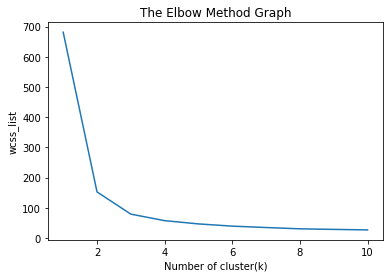

In [29]:
mtp.plot(range(1,11), wcss_list)
mtp.title("The Elbow Method Graph")
mtp.xlabel("Number of cluster(k)")
mtp.ylabel("wcss_list")
mtp.show()

#### <font color=black> From the above plot,see the elbow point is at 3. So the number of clusters here will be 3.</font>

## <font color=black> Training the K-means algorithm on the training dataset </font>

In [30]:
kmeans = KMeans(n_clusters=3,init='k-means++',random_state=42)
y_predict = kmeans.fit_predict(x)

In [32]:
y_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

## <font color=black> Visualizing the Clusters </font>

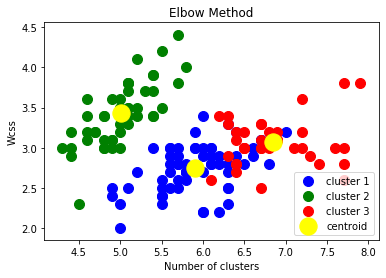

In [40]:
mtp.scatter(x[y_predict == 0,0],x[y_predict == 0,1],s = 100, c = 'blue', label='cluster 1')  #for cluster 1
mtp.scatter(x[y_predict == 1,0],x[y_predict == 1,1],s = 100, c ='green', label='cluster 2')  #for cluster 2
mtp.scatter(x[y_predict == 2,0],x[y_predict == 2,1],s = 100, c = 'red', label='cluster 3')  #for cluster 3


mtp.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:,1],s=300, c='yellow',label='centroid')
mtp.title('Elbow Method')
mtp.xlabel('Number of clusters')
mtp.ylabel('Wcss')
mtp.legend()
mtp.show()